In [2]:
import numpy as np
import pandas as pd


In [4]:
songDf = pd.read_csv("all_songs_data_processed.csv")

In [22]:
sexualWords = {}
curseWords = {
    "fuck", "fucks", "fucked", "fucking",
    "shit", "shits", "shitty", "shitted", "shitting",
    "bitch", "bitches", "bitching",
    "ass", "asses", "asshole", "assholes",
    "damn", "damned", "damning",
    "hell", "hells",
    "bastard", "bastards", "bastardly",
    "crap", "craps", "crapped", "crapping",
    "damnation", "damnations",
    "goddamn", "goddamned", "goddamning", "goddamns",
    "motherfucker", "motherfuckers", "motherfucking",
    "cunt", "cunts", "cunted", "cunting",
    "dick", "dicks", "dicked", "dicking",
    "cock", "cocks", "cocked", "cocking",
    "piss", "pisses", "pissed", "pissing",
    "shithead", "shitheads",
    "fuckhead", "fuckheads",
    "asshat", "asshats",
    "twat", "twats",
    "bollocks", "bollockses",
    "wanker", "wankers",
    "prick", "pricks",
    "douchebag", "douchebags",
    "arse", "arses", "arsed", "arsing",
    "bitchy", "bitchier", "bitchiest",
    "shitty", "shittier", "shittiest",
    "fuckwit", "fuckwits",
    "arsehole", "arseholes",
    "cunty", "cuntier", "cuntiest",
    "dickhead", "dickheads",
    "asshat", "asshats",
    "dickwad", "dickwads",
    "shitbag", "shitbags",
    "twatface", "twatfaces",
    "shitfaced", "shitfacing",
    "cockface", "cockfaces",
    "bullshit", "bullshits", "bullshitted", "bullshitting",
    "fucktard", "fucktards",
    "pissedoff", "pissedoffs",
    "asswipe", "asswipes",
    "bastardized", "bastardizes", "bastardizing",
    "fuckery",
    "crapshoot", "crapshoots",
    "damnatory", "damnatories",
    "goddammit",
    "hellish", "hellishly",
    "motherfucking", "motherfuckings",
    "pisshead", "pissheads",
    "shitty", "shittier", "shittiest",
    "shittily", "shittiness",
    "shite", "shites", "shited", "shiting",
    "fuckedup", "fuckedups",
    "fuckup", "fuckups",
    "dickish", "dickishly",
    "dickweed", "dickweeds",
    "douchey", "douchier", "douchiest",
    "freaking", "freakings",
    "goddamn", "goddamns",
    "motherfuck", "motherfucks", "motherfucker", "motherfuckers",
    "pissedoffness",
    "pissy", "pissier", "pissiest",
    "shitty", "shittily", "shittier", "shittiest", "shittiness",
    "assclown", "assclowns",
    "dickless", "dicklessness",
    "fuckhead", "fuckheads",
    "motherfucker", "motherfuckers",
    "pissedoff", "pissedoffs",
    "shitbag", "shitbags",
    "shitstorm", "shitstorms",
    "assbackwards",
    "assclownery",
    "asshatery",
    "assholeish", "assholeishly",
    "bitchiness",
    "bitchtastic",
    "clusterfuck", "clusterfucks",
    "cocksucker", "cocksuckers",
    "cuntfaced", "cuntfaces",
    "cuntwhistle", "cuntwhistles",
    "dickheaded", "dickheadedly",
    "dickishness",
    "fuckwad", "fuckwads",
    "shitbrick", "shitbricks",
    "shithead", "shitheads",
    "shitkicker", "shitkickers",
    "shitload", "shitloads",
    "shitshow", "shitshows",
    "shitstain", "shitstains",
    "shitstorm", "shitstorms",
    "shitwit", "shitwits",
    "twatwaffle", "twatwaffles",
    "wankerish", "wankerishly"
}

religiousWords = {
    "god", "allah", "jesus", "christ", "buddha", "krishna", "yahweh", "shiva",
    "moses", "abraham", "muhammad", "guru", "saint", "spirit", "faith", "prayer",
    "worship", "church", "temple", "mosque", "bible", "quran", "veda", "torah",
    "angel", "heaven", "hell", "sin", "forgiveness", "salvation", "divine", "holy",
    "miracle", "prophet", "soul", "sacred", "devotion", "pilgrimage", "ritual",
    "ceremony", "blessing", "curse", "commandment", "belief", "eternity", "afterlife",
    "rebirth", "meditation", "enlightenment", "nirvana", "karma", "dharma",
    "apostle", "cross", "crucifixion", "resurrection", "savior", "atonement",
    "martyr", "ascension", "sinners", "grace", "mercy", "judgment", "sacrifice",
    "sermon", "serenity", "holiness", "sabbath", "paradise", "hades", "devil",
    "demon", "angel", "heresy", "orthodox", "revelation", "belief", "purity",
    "pilgrim", "altar", "chant", "doctrine", "gospel", "psalm", "hymn", "ritual",
    "proclamation", "prophecy", "testament", "scripture", "sanctuary", "vow",
    "penance", "repentance", "sacrament", "tabernacle", "adoration", "monastery",
    "nun", "monk", "bishop", "clergy", "laity", "congregation", "sect", "denomination",
    "calvary", "covenant", "communion", "baptism", "confession", "ordination",
    "pope", "priest", "deacon", "altar", "crucifix", "psaltery", "grail", "chalices",
    "vestment", "mitre", "rosary", "relic", "medallion", "thurible", "sanctuary",
    "vestry", "lectionary", "missal", "lection", "lectionary", "litany", "novena",
    "collect", "exorcism", "liturgy", "evangelist", "catechism", "trinity",
    "benediction", "intercession", "veneration", "ministry", "testimony",
    "blasphemy", "orthodoxy", "apocrypha", "ark", "gospel", "lent", "epiphany",
    "passover", "advent", "easter", "pentecost", "holyweek", "ramadan", "diwali",
    "yomkippur", "eid", "saturnalia", "shrovetuesday", "chanukah", "christmas",
    "hannukah", "goodfriday", "ashwednesday", "sukkot", "purim", "vesak",
    "kumbhmela", "eidalfitr", "eidaladha", "roshhashanah", "hanumanjayanti",
    "ashura", "basantpanchami", "mahashivratri", "gurunanakjayanti",
    "divalifestival", "navratri", "rakshabandhan", "makarsankranti",
    "krishnaasthami", "gurupurnima", "lohri", "diwali", "holi", "onam",
    "palmsonday", "maundythursday", "holysaturday", "ascensionday", "saintsday",
    "allhallows", "ststephensday", "epiphany", "candlemas", "assumptionday",
    "stvalentinesday", "stpatrickday", "annunciation", "stgeorgesday",
    "standrewsday", "stnicholasday", "eastermonday", "whitmonday", "trinitysunday",
    "corpuschristi", "saintjohnthebaptist", "allsaintsday", "stcatherinesday",
    "stbarbarasday", "stluciasday", "stpatricksday", "adventcalendar"
}

In [16]:
def numWords(lyrics, setToCheck):
  toReturn = 0

  try:
    listWords = lyrics.split()
    for i in listWords:
      try:
        i = i.lower()
      except AttributeError:
        continue
      if i in setToCheck:
        toReturn += 1

  except AttributeError:
    return toReturn


  return toReturn

In [20]:
songDf['ReligiousCount'] = songDf['Lyrics'].apply(lambda x: numWords(x, religiousWords))

In [34]:
songDf['CurseCount'] = songDf['Lyrics'].apply(lambda x: numWords(x, curseWords))

In [24]:
import matplotlib.pyplot as plt


In [37]:
byYear = songDf.groupby('Year')
songDf['CurseCountByYear'] = byYear['CurseCount'].transform('sum')

In [38]:
byYear = songDf[['Year', 'CurseCountByYear']].reset_index()
byYear = byYear.drop_duplicates(subset=['Year', 'CurseCountByYear']).reset_index(drop=True)

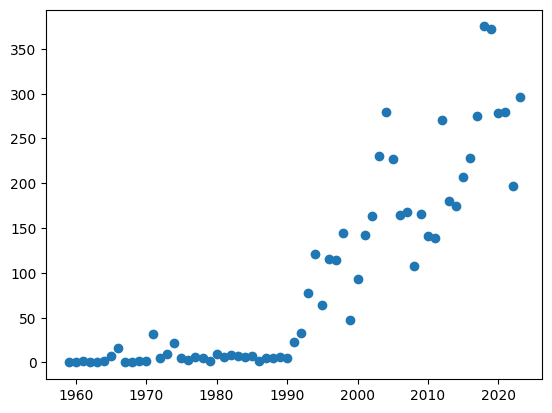

In [39]:
plt.scatter(byYear['Year'], byYear['CurseCountByYear'])

Text(0.5, 1.0, 'Average number of Curse Words in Songs overtime')

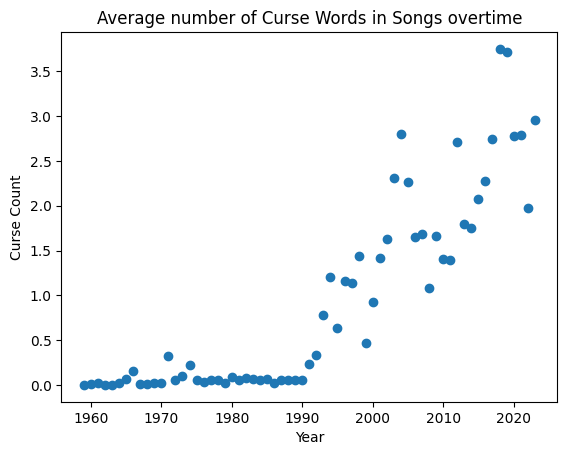

In [42]:
plt.scatter(byYear['Year'], byYear['CurseCountByYear'] / 100)
plt.xlabel('Year')
plt.ylabel('Curse Count')
plt.title('Average number of Curse Words in Songs overtime')